## Pandas的应用-1

Pandas是Wes McKinney在2008年开发的一个强大的**分析结构化数据**的工具集。Pandas以NumPy为基础（数据表示和运算），提供了用于数据处理的函数和方法，对数据分析和数据挖掘提供了很好的支持；同时Pandas还可以跟数据可视化工具Matplotlib很好的整合在一起，非常轻松愉快的实现数据的可视化展示。

Pandas核心的数据类型是`Series`（数据系列）、`DataFrame`（数据表/数据框），分别用于处理一维和二维的数据，除此之外还有一个名为`Index`的类型及其子类型，它为`Series`和`DataFrame`提供了索引功能。日常工作中以`DataFrame`使用最为广泛，因为二维的数据本质就是一个有行有列的表格（想一想Excel电子表格和关系型数据库中的二维表）。上述这些类型都提供了大量的处理数据的方法，数据分析师可以以此为基础实现对数据的各种常规处理。

### Series的应用

Pandas库中的`Series`对象可以用来表示一维数据结构，跟数组非常类似，但是多了一些额外的功能。`Series`的内部结构包含了两个数组，其中一个用来保存数据，另一个用来保存数据的索引。

#### 创建Series对象

> **提示**：在执行下面的代码之前，请先导入`pandas`以及相关的库文件，具体的做法可以参考上一章。

##### 方法1：通过列表或数组创建Series对象

In [29]:
import pandas as pd
import numpy as np

In [3]:
ser1 = pd.Series(data=[320, 180, 300, 405], index=['一季度', '二季度', '三季度', '四季度'])
ser1

一季度    320
二季度    180
三季度    300
四季度    405
dtype: int64

##### 方法2：通过字典创建Series对象。

In [4]:
ser2 = pd.Series({'一季度': 320, '二季度': 180, '三季度': 300, '四季度': 405})
ser2

一季度    320
二季度    180
三季度    300
四季度    405
dtype: int64

#### 索引和切片

跟数组一样，Series对象也可以进行索引和切片操作，不同的是Series对象因为内部维护了一个保存索引的数组，所以除了可以使用整数索引通过位置检索数据外，还可以通过自己设置的索引标签获取对应的数据。

##### 使用整数索引

In [5]:
print(ser2[0], ser2[1], ser2[2], ser2[3])
ser2[0], ser2[3] = 350, 360
print(ser2)

320 180 300 405
一季度    350
二季度    180
三季度    300
四季度    360
dtype: int64


**提示**：如果要使用负向索引，必须在创建`Series`对象时通过`index`属性指定非数值类型的标签。

##### 使用自定义的标签索引

In [6]:
print(ser2['一季度'], ser2['三季度'])
ser2['一季度'] = 380
print(ser2)

350 300
一季度    380
二季度    180
三季度    300
四季度    360
dtype: int64


##### 切片操作

In [7]:
print(ser2[1:3])
print(ser2['二季度':'四季度'])

二季度    180
三季度    300
dtype: int64
二季度    180
三季度    300
四季度    360
dtype: int64


In [8]:
ser2[1:3] = 400, 500
ser2

一季度    380
二季度    400
三季度    500
四季度    360
dtype: int64

##### 花式索引

In [9]:
print(ser2[['二季度', '四季度']])
ser2[['二季度', '四季度']] = 500, 520
print(ser2)

二季度    400
四季度    360
dtype: int64
一季度    380
二季度    500
三季度    500
四季度    520
dtype: int64


#### 布尔索引

In [11]:
ser2[ser2 >= 500]

二季度    500
三季度    500
四季度    520
dtype: int64

#### 属性和方法

Series对象的常用属性如下表所示。

| 属性                      | 说明                                    |
| ------------------------- | --------------------------------------- |
| `dtype` / `dtypes`        | 返回`Series`对象的数据类型              |
| `hasnans`                 | 判断`Series`对象中有没有空值            |
| `at` / `iat`              | 通过索引访问`Series`对象中的单个值      |
| `loc` / `iloc`            | 通过一组索引访问`Series`对象中的一组值  |
| `index`                   | 返回`Series`对象的索引                 |
| `is_monotonic`            | 判断`Series`对象中的数据是否单调        |
| `is_monotonic_increasing` | 判断`Series`对象中的数据是否单调递增    |
| `is_monotonic_decreasing` | 判断`Series`对象中的数据是否单调递减    |
| `is_unique`               | 判断`Series`对象中的数据是否独一无二    |
| `size`                    | 返回`Series`对象中元素的个数            |
| `values`                  | 以`ndarray`的方式返回`Series`对象中的值 |

`Series`对象的方法很多，我们通过下面的代码为大家介绍一些常用的方法。

##### 统计相关的方法

`Series`对象支持各种获取描述性统计信息的方法。

In [27]:
# 求和
print(ser2.sum())
# 求均值
print(ser2.mean())
# 求最大
print(ser2.max())
# 求最小
print(ser2.min())
# 计数
print(ser2.count())
# 求标准差
print(ser2.std())
# 求方差
print(ser2.var())
# 求中位数
print(ser2.median())

print(ser2.dtype)
print(ser2.dtypes)
print(ser2.hasnans)
#print(ser2.iat(2))
print(ser2.is_monotonic)
print(ser2.is_monotonic_decreasing)
print(ser2.is_monotonic_increasing)
print(ser2.describe())
print(ser2.unique())
print(ser2.nunique())
print(ser2.value_counts())

1900
475.0
520
380
4
64.03124237432849
4100.0
500.0
int64
int64
False
True
False
True
count      4.000000
mean     475.000000
std       64.031242
min      380.000000
25%      470.000000
50%      500.000000
75%      505.000000
max      520.000000
dtype: float64
[380 500 520]
3
500    2
520    1
380    1
dtype: int64


**提示**：因为`describe()`返回的也是一个`Series`对象，所以也可以用`ser2.describe()['mean']`来获取平均值。

如果`Series`对象有重复的值，我们可以使用`unique()`方法获得去重之后的`Series`对象；可以使用`nunique()`方法统计不重复值的数量；如果想要统计每个值重复的次数，可以使用`value_counts()`方法，这个方法会返回一个`Series`对象，它的索引就是原来的`Series`对象中的值，而每个值出现的次数就是返回的`Series`对象中的数据，在默认情况下会按照出现次数做降序排列

##### 数据处理的方法

`Series`对象的`isnull()`和`notnull()`方法可以用于空值的判断

In [30]:
ser4 = pd.Series(data=[10, 20, np.NaN, 30, np.NaN])
ser4.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

`Series`对象的`dropna()`和`fillna()`方法分别用来删除空值和填充空值

In [31]:
ser4.dropna()

0    10.0
1    20.0
3    30.0
dtype: float64

In [34]:
ser4.fillna(value=33)

0    10.0
1    20.0
2    33.0
3    30.0
4    33.0
dtype: float64

In [35]:
# backfill或bfill表示用后一个元素的值填充空值
# ffill或pad表示用前一个元素的值填充空值
ser4.fillna(method='ffill')

0    10.0
1    20.0
2    20.0
3    30.0
4    30.0
dtype: float64

需要提醒大家注意的是，`dropna()`和`fillna()`方法都有一个名为`inplace`的参数，它的默认值是`False`，表示删除空值或填充空值不会修改原来的`Series`对象，而是返回一个新的`Series`对象来表示删除或填充空值后的数据系列，如果将`inplace`参数的值修改为`True`，那么删除或填充空值会就地操作，直接修改原来的`Series`对象，那么方法的返回值是`None`。后面我们会接触到的很多方法，包括`DataFrame`对象的很多方法都会有这个参数，它们的意义跟这里是一样的。

`Series`对象的`mask()`和`where()`方法可以将满足或不满足条件的值进行替换

In [39]:
ser5 = pd.Series(range(5))
print(ser5)
print(ser5.where(ser5>1, 20))
ser5.mask(ser5>1, 20)


0    0
1    1
2    2
3    3
4    4
dtype: int64
0    20
1    20
2     2
3     3
4     4
dtype: int64


0     0
1     1
2    20
3    20
4    20
dtype: int64

`Series`对象的`duplicated()`方法可以帮助我们找出重复的数据，而`drop_duplicates()`方法可以帮我们删除重复数据

In [42]:
ser5.where(ser5>1, 10, inplace=True)
ser5.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [45]:
ser5.drop_duplicates(inplace=True)
print(ser5)

0    10
2     2
3     3
4     4
dtype: int64


`Series`对象的`apply()`和`map()`方法非常重要，它们可以用于数据处理，把数据映射或转换成我们期望的样子，这个操作在数据分析的数据准备阶段非常重要

In [46]:
ser6 = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
ser6

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

In [48]:
ser6.map({'cat': 'kitten', 'dog': 'puppy'})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

In [49]:
ser6.map('I am a {}'.format, na_action='ignore')

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object

In [52]:
ser7 = pd.Series([20, 12, 21], index=['London', 'New York', 'Helsinki'])
print(ser7)
ser7.apply(np.sqrt)

London      20
New York    12
Helsinki    21
dtype: int64


London      4.472136
New York    3.464102
Helsinki    4.582576
dtype: float64

In [53]:
ser7.apply(lambda x, value: x - value, args=(5,))

London      15
New York     7
Helsinki    16
dtype: int64

##### 排序和取头部值的方法

`Series`对象的`sort_index()`和`sort_values()`方法可以用于对索引和数据的排序，排序方法有一个名为`ascending`的布尔类型参数，该参数用于控制排序的结果是升序还是降序；而名为`kind`的参数则用来控制排序使用的算法，默认使用了`quicksort`，也可以选择`mergesort`或`heapsort`；如果存在空值，那么可以用`na_position`参数空值放在最前还是最后，默认是`last`

In [54]:
ser7.sort_index(ascending=True)

Helsinki    21
London      20
New York    12
dtype: int64

In [55]:
ser7.sort_index(ascending=False)

New York    12
London      20
Helsinki    21
dtype: int64

In [56]:
ser7.sort_values(ascending=False)

Helsinki    21
London      20
New York    12
dtype: int64

如果要从`Series`对象中找出元素中最大或最小的“Top-N”，实际上是不需要对所有的值进行排序的，可以使用`nlargest()`和`nsmallest()`方法来完成

In [57]:
ser7.nlargest(2)

Helsinki    21
London      20
dtype: int64

#### 绘制图表

Series对象有一个名为`plot`的方法可以用来生成图表，如果选择生成折线图、饼图、柱状图等，默认会使用Series对象的索引作为横坐标，使用Series对象的数据作为纵坐标。

首先导入`matplotlib`中`pyplot`模块并进行必要的配置

In [60]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei', ]
plt.rcParams['axes.unicode_minus'] = False

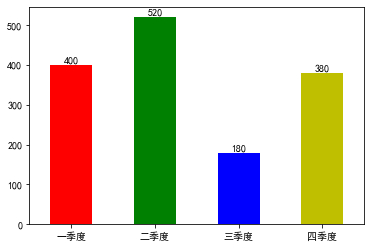

In [71]:
ser9 = pd.Series({'一季度': 400, '二季度': 520, '三季度': 180, '四季度': 380})
ser9.plot(kind='bar', color=['r', 'g', 'b', 'y'])
plt.xticks(rotation=0)
for i in range(4):
    plt.text(i, ser9[i]+5, ser9[i], ha='center')
plt.show()

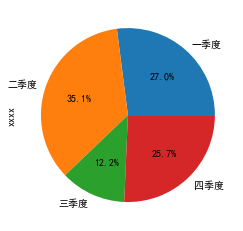

In [72]:
ser9.plot(kind='pie', autopct='%.1f%%')
plt.ylabel('xxxx')
plt.show()

In [73]:
ser9.plot?